# ROC and AUC 

This notebook covers the basics of Receiver Operator Characteristic (ROC) graphs and the concept of the area under the curve (AUC).

Source: "ROC and AUC, Clearly Explained!", StatQuest with Josh Starmer https://www.youtube.com/watch?v=4jRBRDbJemM

Data Science Project Steps:

    1) Load the data

    2) Define appropriate X and y

    3) Normalize the Data

    4) Split the data into train and test sets.

    5) Fit a model

    6) Predict

## Part 1: Model Confusion Matrix


### A confusion matrix for a binary model
![Binary Classifiction Confusion Matrix](supporting_images/Binary_Classifiction_Confusion_Matrix.jpg)


### A confusion matrix for a multi-categorical model
![Multi-Categorical Classifiction Confusion Matrix](supporting_images/Multi_Categorical_Models.png)


## Part 2: Sensitivity and Specificity

Sensitivity is the model's ability to correctly identify positives (belongs to a class). Specificity is the model's ability to correctly identify negatives (does not belong to a class):

![Sensitivity and Specificity Calculations](supporting_images/Sensitivity_and_Specificity.png)


### Calculating Sensitivity
![Calculating Sensitivity](supporting_images/Sensitivity_Categorical_Models.png)


### Calculating Specificity
![Calculating Specificity](supporting_images/Specificity_Categorical_Models.png)



## Part 3: ROC and AUC

Let's evaluate a categorical model with a threshold feature.


In [12]:
#Your code here
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [13]:
from sklearn import datasets

## Just 0 and 1

In [14]:
iris = datasets.load_iris()

X = iris.data
y = iris.target
iris = pd.DataFrame(data= np.c_[X, y],
                     columns= iris['feature_names'] + ['target'])

In [15]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [16]:
iris = iris[iris.target != 2.0]

In [17]:
X = iris[["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]]
X.head()
y = iris["target"]
y.head()

50    0.0
51    0.0
52    0.0
53    0.0
54    0.0
Name: target, dtype: float64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [19]:
#Fit a model
logreg = LogisticRegression(fit_intercept = False, C = 1e12) #Starter code
model_log = logreg.fit(X_train, y_train)
print(model_log)

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [20]:
#Predict
y_hat_test = logreg.predict(X_test)

In [21]:
# Your code here
from sklearn.metrics import roc_curve, auc

#for various decision boundaries given the case member probabilites

#First calculate the probability scores of each of the datapoints:
y_score = model_log.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

y_train_score = model_log.decision_function(X_train)
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_score)

AUC: 0.9743589743589745


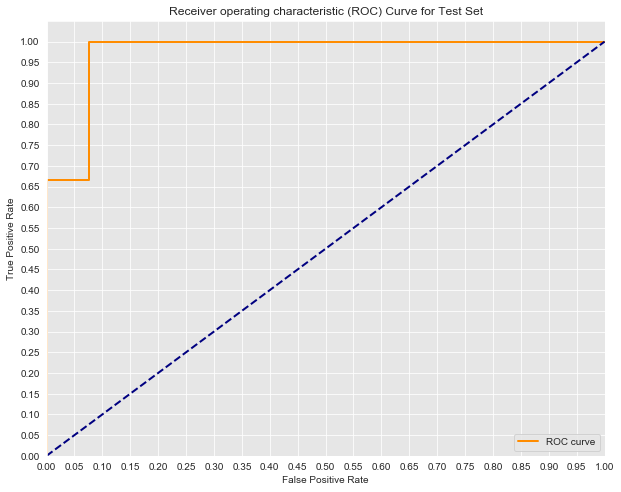

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Seaborns Beautiful Styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Test Set')
plt.legend(loc="lower right")
print('AUC: {}'.format(auc(fpr, tpr)))
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [ ]:
# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Encode the classes
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

## Create the classifier and a scoring array

In [ ]:
# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)


Add additional metrics

In [ ]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])